In [9]:
import os
os.chdir('/Users/yinancheng/Documents/Project/TrustworthyAI/Advertisement/')

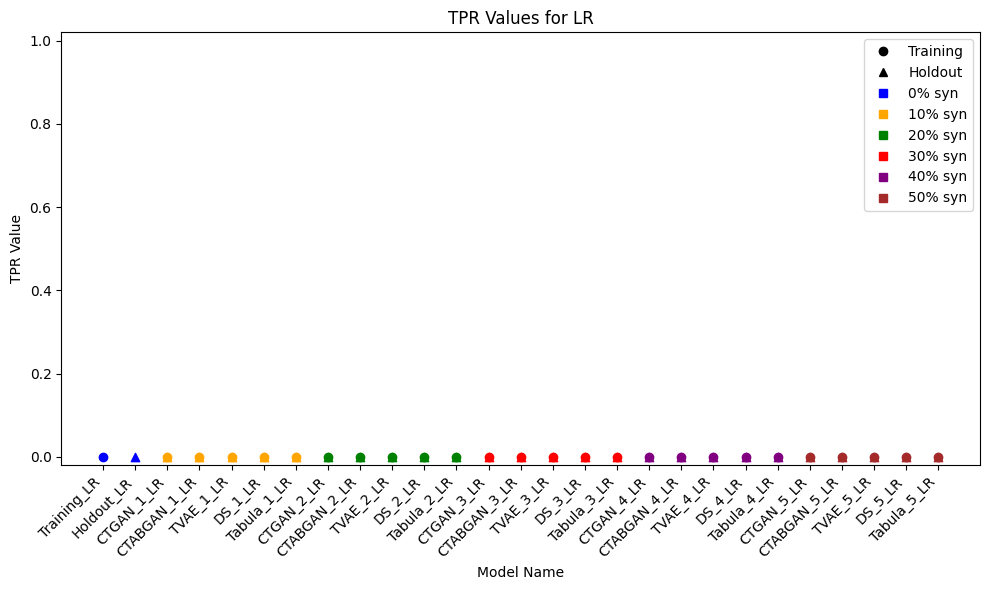

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import os

task_id = 18800
result_path = f'Result/potential_{task_id}/potential_{task_id}'
# file_path = 'result_mixed_18800.csv'  # Change this to the correct file path if necessary
file_path = f'Data/potential_{task_id}/result_mixed.csv'  # Change this to the correct file path if necessary

def plot_metric_values(file_path, metric, model):
    # Load the CSV file
    data = pd.read_csv(file_path)

    # Extract the base name of the file without extension
    #base_name = os.path.splitext(os.path.basename(file_path))[0]

    plt.figure(figsize=(10,6))

    # Filter the data to include relevant rows
    data_training = data[data['Unnamed: 0'].str.contains(f'Training_{model}')]
    data_holdout = data[data['Unnamed: 0'].str.contains(f'Holdout_{model}')]
    # Extract the model names and metric values
    model_names_training = data_training['Unnamed: 0']
    model_names_holdout = data_holdout['Unnamed: 0']
    
    metric_values_training = data_training[metric]
    metric_values_holdout = data_holdout[metric]
    # Create the plot
    plt.scatter(model_names_training, metric_values_training, color='blue', label=f'Training ({model})')
    plt.scatter(model_names_holdout, metric_values_holdout, marker = '^', color='blue', label=f'Holdout ({model})')
    
    # Synthetic data for '_1', '_2', '_3', '_4', and '_5'
    # Filter the data to include relevant rows
    # Extract the model names and metric values
    # Create plots
    colors = ['orange','green','red','purple','brown']
    for i in range(5):
        data_ = data[data['Unnamed: 0'].str.contains(f'{i+1}_{model}')] 
        
        data_training = data_[data_['Unnamed: 0'].str.contains(f'training')]
        model_names = data_training['Unnamed: 0'].str[9:]
        metric_values_training = data_training[metric] 
        plt.scatter(model_names, metric_values_training, color=colors[i], label=f'Training_syn{i+1} ({model})')
        
        data_holdout = data_[data_['Unnamed: 0'].str.contains(f'holdout')]
        metric_values_holdout = data_holdout[metric]
        plt.scatter(model_names, metric_values_holdout, marker='^',color=colors[i], label=f'Holdout_syn{i+1} ({model})')
        
    
    plt.xlabel('Model Name')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel(f'{metric} Value')
    plt.title(f'{metric} Values for {model}')
    plt.ylim(-0.02, 1.02)
    markers=['o','^']
    colors = ['blue','orange','green','red','purple','brown']
    f = lambda c,m: plt.plot([],[],color=c,marker=m, ls="none")[0]
    handles = [f("k", markers[i]) for i in range(2)]
    handles += [f(colors[i], "s") for i in range(6)]

    labels = ['Training','Holdout','0% syn','10% syn','20% syn','30% syn','40% syn','50% syn']

    plt.legend(handles, labels, loc="best")

    plt.tight_layout()

    # Save the plot
    #output_path = f'{result_path}_{metric}_mixed_plot.png'
    #plt.savefig(output_path)
    #plt.show()

# Example usage

metrics = ['Accuracy', 'AUC', 'F1', 'Recall', 'Precision', 'AP', 'TPR', 'FPR', 'TNR', 'FNR']
metric = metrics[6]
models = ['LR', 'DT', 'KNN', 'NB', 'SVM', 'RF', 'XGB']  # List of all models
model = models[0]
plot_metric_values(file_path, metric, model)

/var/folders/k9/hsjly5l56pb4_mv17mxbvn100000gn/T/ipykernel_21841/3746401477.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(model_names_all, rotation=45, ha='right')


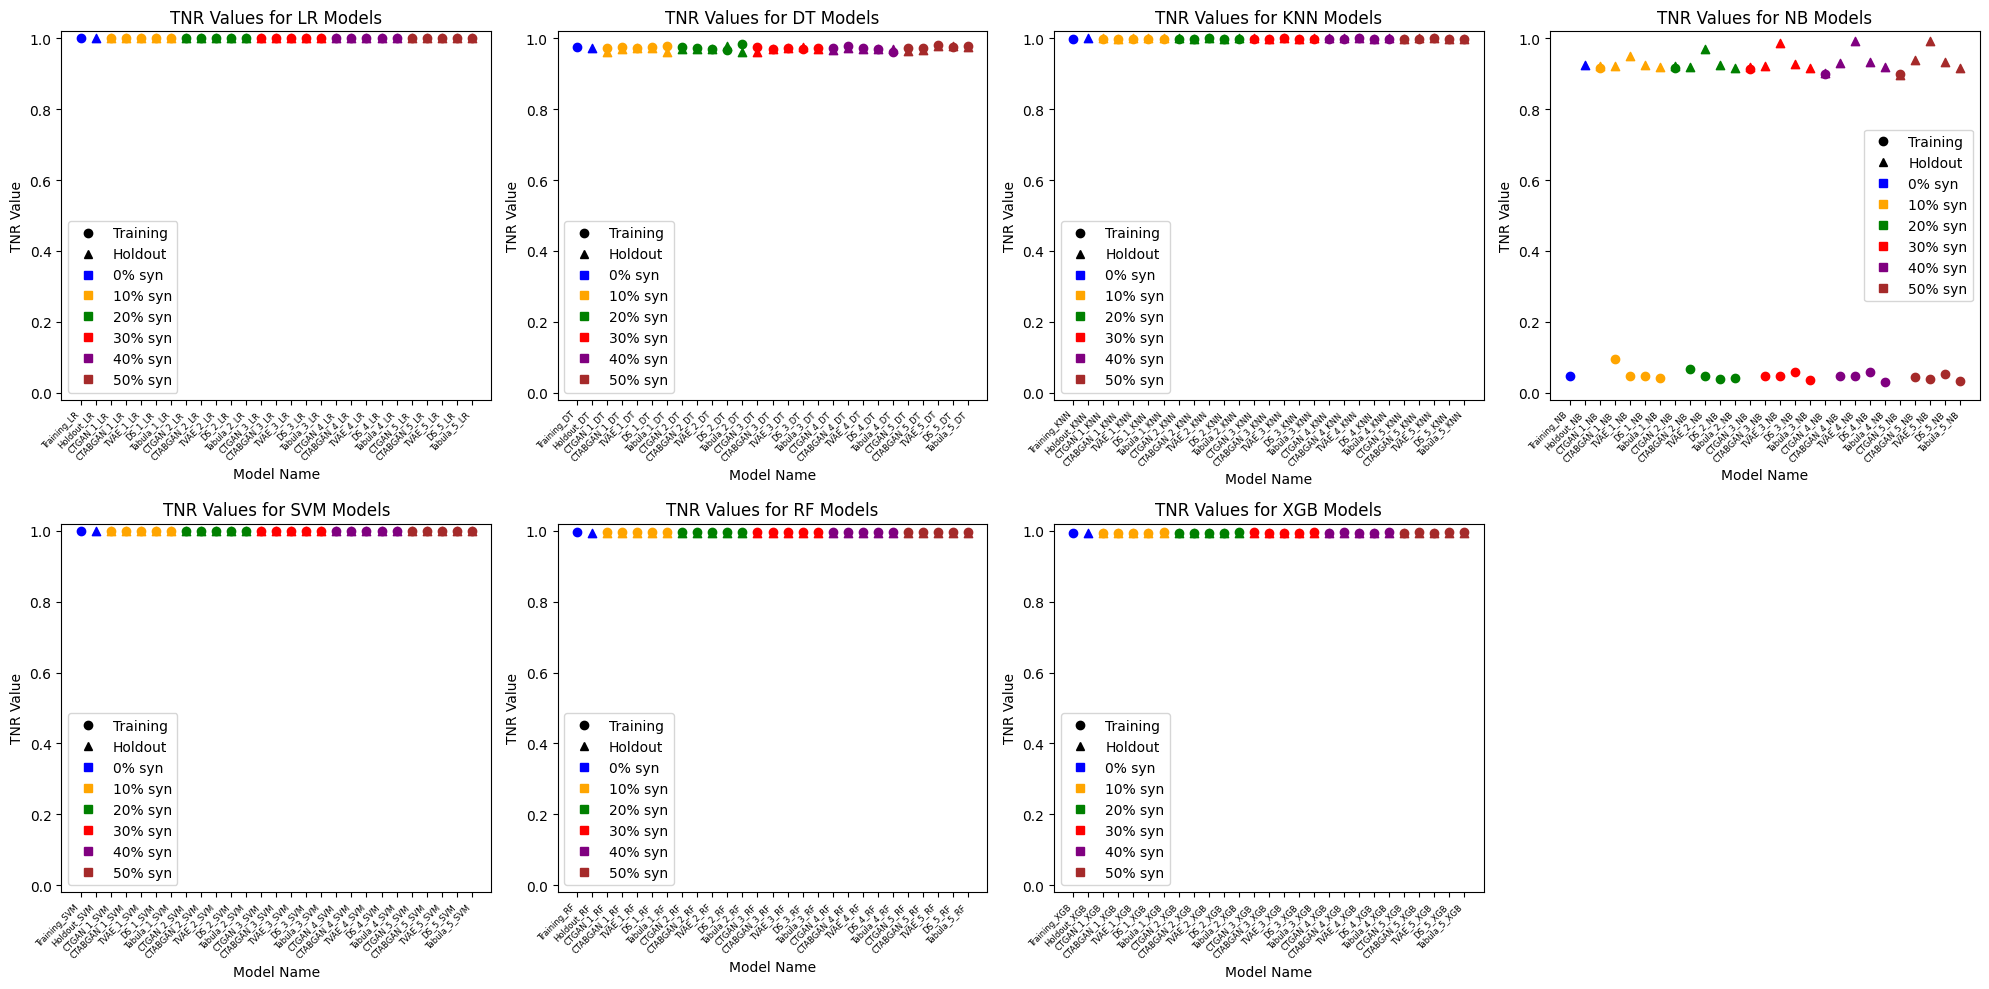

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_all_models_for_metric(file_path, metric, models):
    # Load the CSV file
    data = pd.read_csv(file_path)

    # Extract the base name of the file without extension
    #base_name = os.path.splitext(os.path.basename(file_path))[0]

    # Create subplots in a 2x4 grid
    fig, axs = plt.subplots(2, 4, figsize=(20, 10))
    axs = axs.flatten()

    for i, model in enumerate(models):
        # Filter the data to include relevant rows
        
        # Filter the data to include relevant rows
        model_names_all = []
        data_training = data[data['Unnamed: 0'].str.contains(f'Training_{model}')]
        data_holdout = data[data['Unnamed: 0'].str.contains(f'Holdout_{model}')]
    # Extract the model names and metric values
        model_names_training = data_training['Unnamed: 0']
        model_names_holdout = data_holdout['Unnamed: 0']
        model_names_all = model_names_all + list(model_names_training) + list(model_names_holdout)
        
        metric_values_training = data_training[metric]
        metric_values_holdout = data_holdout[metric]
    # Create the plot
        axs[i].scatter(model_names_training, metric_values_training, color='blue', label=f'Training ({model})')
        axs[i].scatter(model_names_holdout, metric_values_holdout, marker = '^', color='blue', label=f'Holdout ({model})')
    
        
        colors = ['orange','green','red','purple','brown']
        
        for j in range(5): # j+1 : number for the mixed rate, j+1 = 2 means the rate is 20%
            data_ = data[data['Unnamed: 0'].str.contains(f'{j+1}_{model}')] 
        
            data_training = data_[data_['Unnamed: 0'].str.contains(f'training')]
            model_names = data_training['Unnamed: 0'].str[9:]
            model_names_all = model_names_all + list(model_names)
            metric_values_training = data_training[metric] 
            axs[i].scatter(model_names, metric_values_training, color=colors[j], label=f'Training_syn{j+1} ({model})')
        
            data_holdout = data_[data_['Unnamed: 0'].str.contains(f'holdout')]
            metric_values_holdout = data_holdout[metric]
            axs[i].scatter(model_names, metric_values_holdout, marker='^',color=colors[j], label=f'Holdout_syn{j+1} ({model})')
        
        
        axs[i].set_xticklabels(model_names_all, rotation=45, ha='right')
        axs[i].set_xlabel('Model Name')
        axs[i].tick_params(axis='x', labelsize=6)
        axs[i].set_ylabel(f'{metric} Value')
        axs[i].set_title(f'{metric} Values for {model} Models')
        axs[i].set_ylim(-0.02, 1.02)
        
        markers=['o','^']
        colors = ['blue','orange','green','red','purple','brown']
        f = lambda c,m: plt.plot([],[],color=c,marker=m, ls="none")[0]
        handles = [f("k", markers[i]) for i in range(2)]
        handles += [f(colors[i], "s") for i in range(6)]

        labels = ['Training','Holdout','0% syn','10% syn','20% syn','30% syn','40% syn','50% syn']

        #plt.legend(handles, labels, loc=3, framealpha=1)
        #axs[i].legend(loc='best')
        axs[i].legend(handles, labels, loc='best')
    # Hide any unused subplots
    for j in range(len(models), len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()

    # Save the plot
    #output_path = f'{result_path}_{metric}_mixed_plot.png'
    #plt.savefig(output_path)
    #plt.show()

# Example usage
# file_path = 'result_mixed_18800.csv'  # Change this to the correct file path if necessary

metrics = ['Accuracy', 'AUC', 'F1', 'Recall', 'Precision', 'AP', 'TPR', 'FPR', 'TNR', 'FNR']
metric = metrics[8]
models = ['LR', 'DT', 'KNN', 'NB', 'SVM', 'RF', 'XGB']  # List of all models

plot_all_models_for_metric(file_path, metric, models)

/var/folders/k9/hsjly5l56pb4_mv17mxbvn100000gn/T/ipykernel_21841/377898151.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(model_names_all, rotation=45, ha='right')


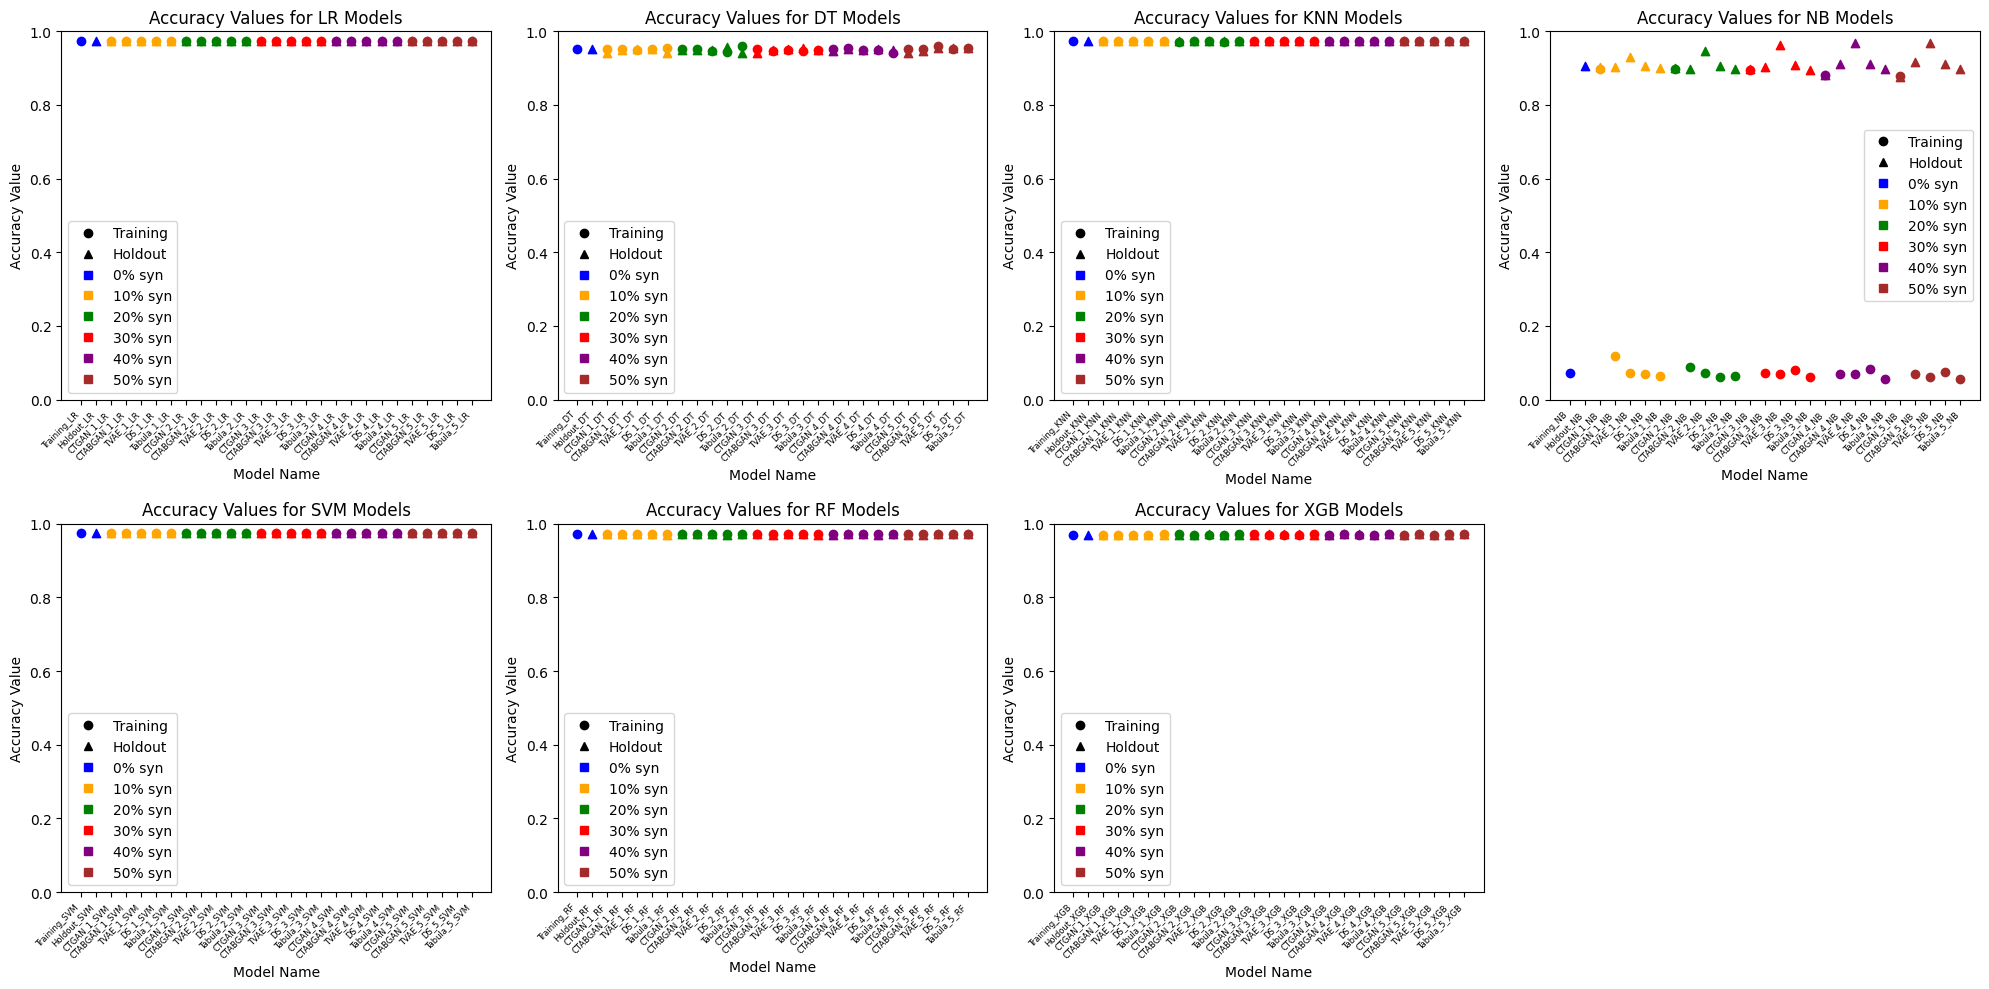

/var/folders/k9/hsjly5l56pb4_mv17mxbvn100000gn/T/ipykernel_21841/377898151.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(model_names_all, rotation=45, ha='right')


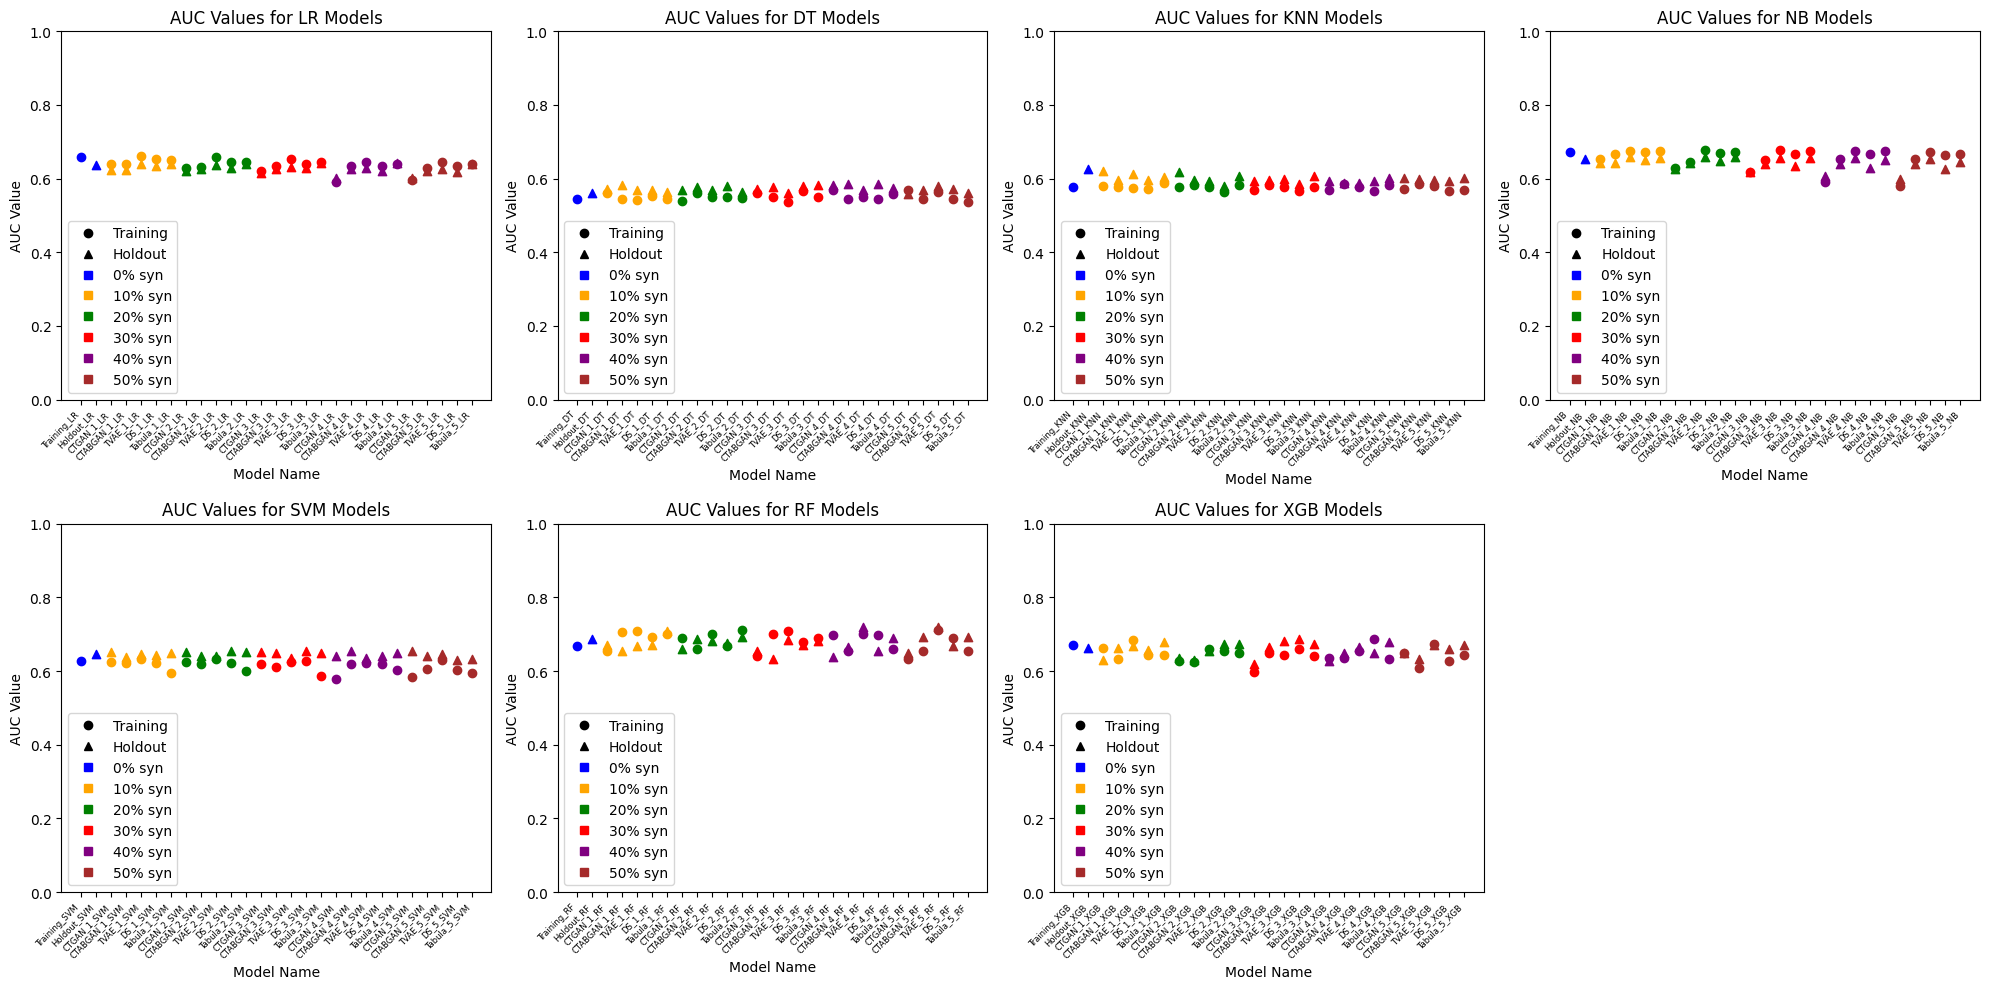

/var/folders/k9/hsjly5l56pb4_mv17mxbvn100000gn/T/ipykernel_21841/377898151.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(model_names_all, rotation=45, ha='right')


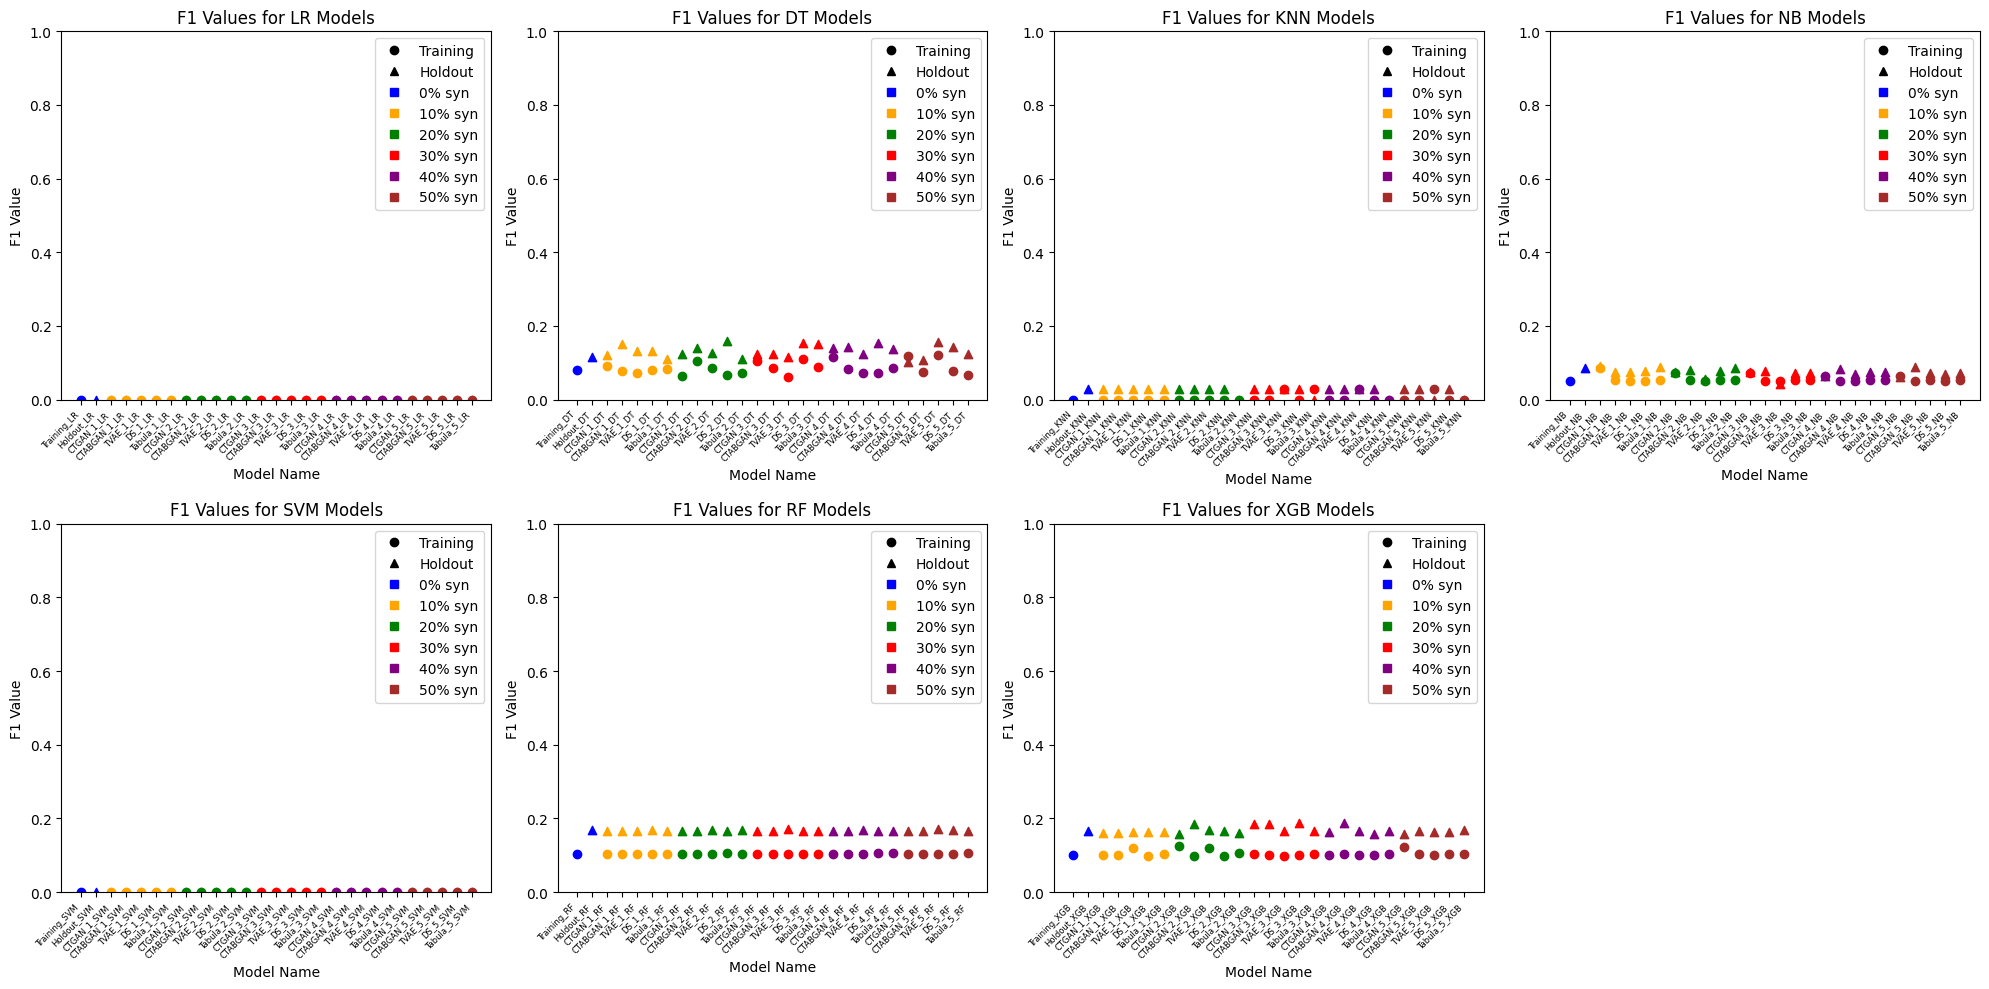

/var/folders/k9/hsjly5l56pb4_mv17mxbvn100000gn/T/ipykernel_21841/377898151.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(model_names_all, rotation=45, ha='right')


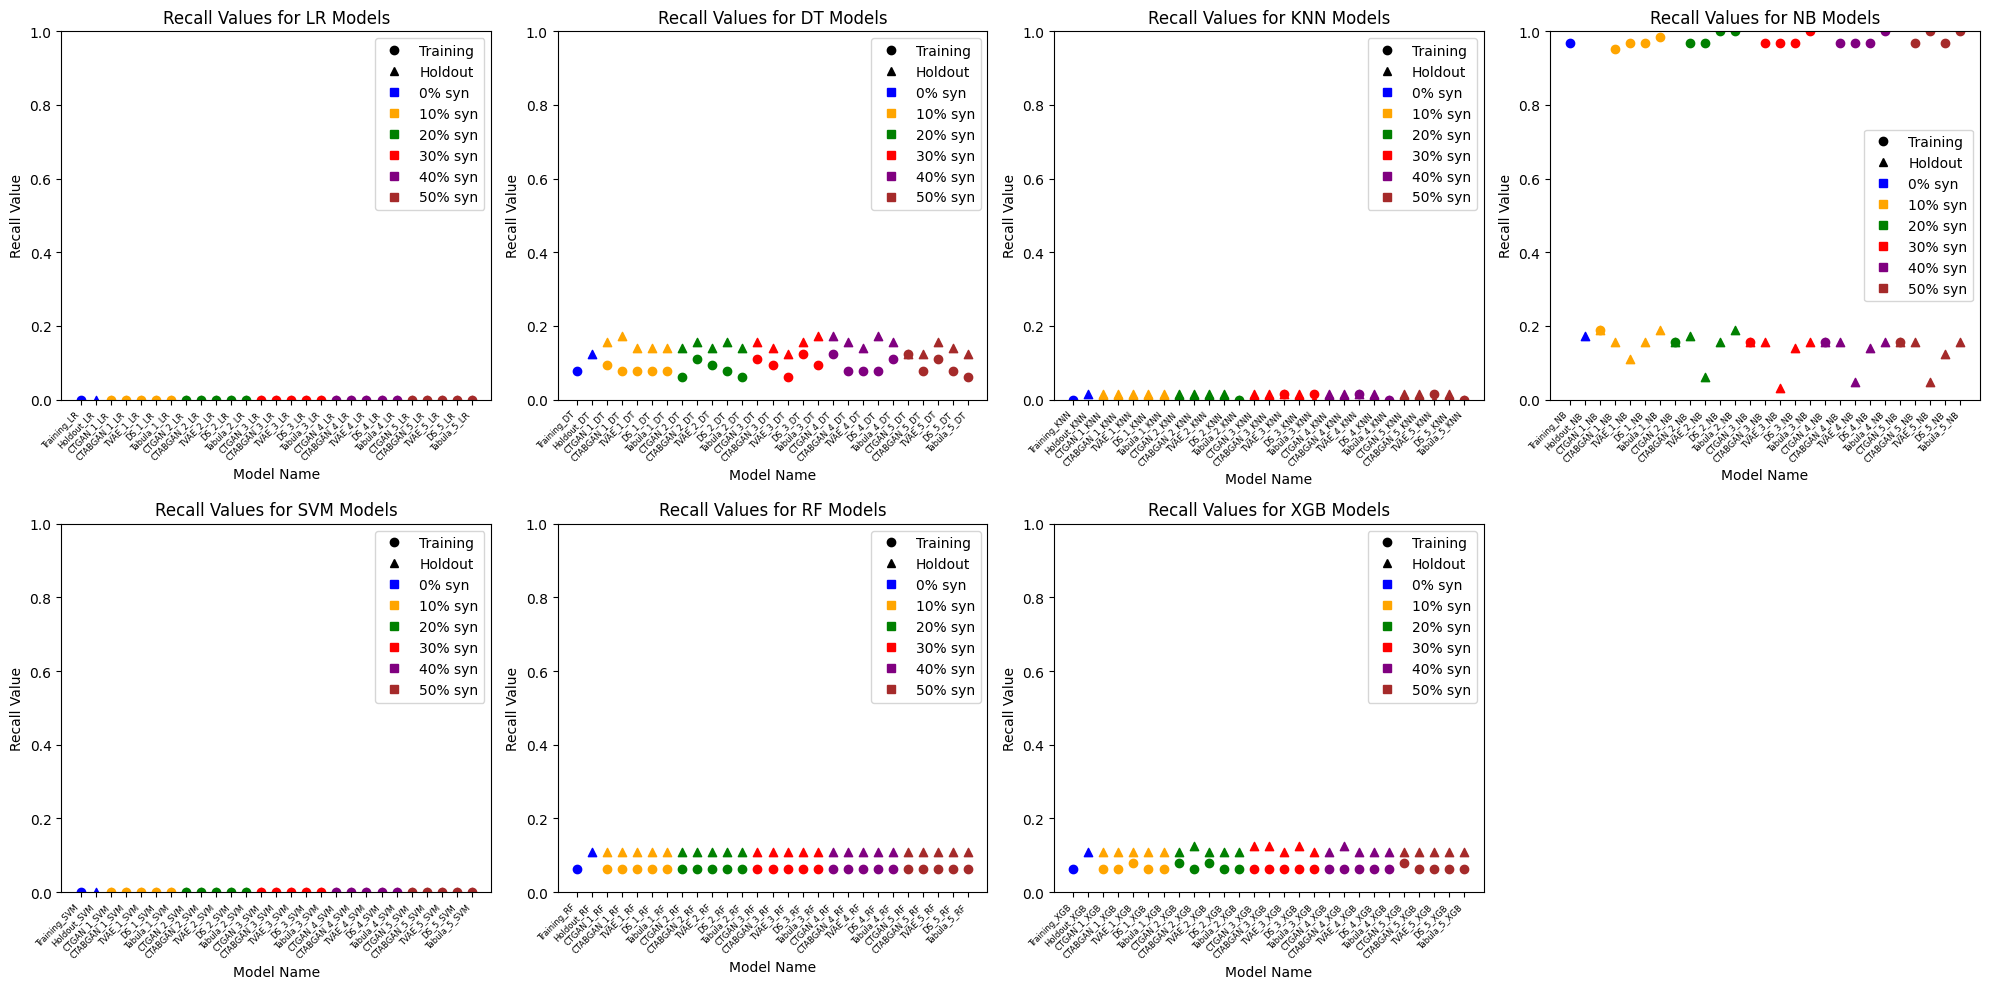

/var/folders/k9/hsjly5l56pb4_mv17mxbvn100000gn/T/ipykernel_21841/377898151.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(model_names_all, rotation=45, ha='right')


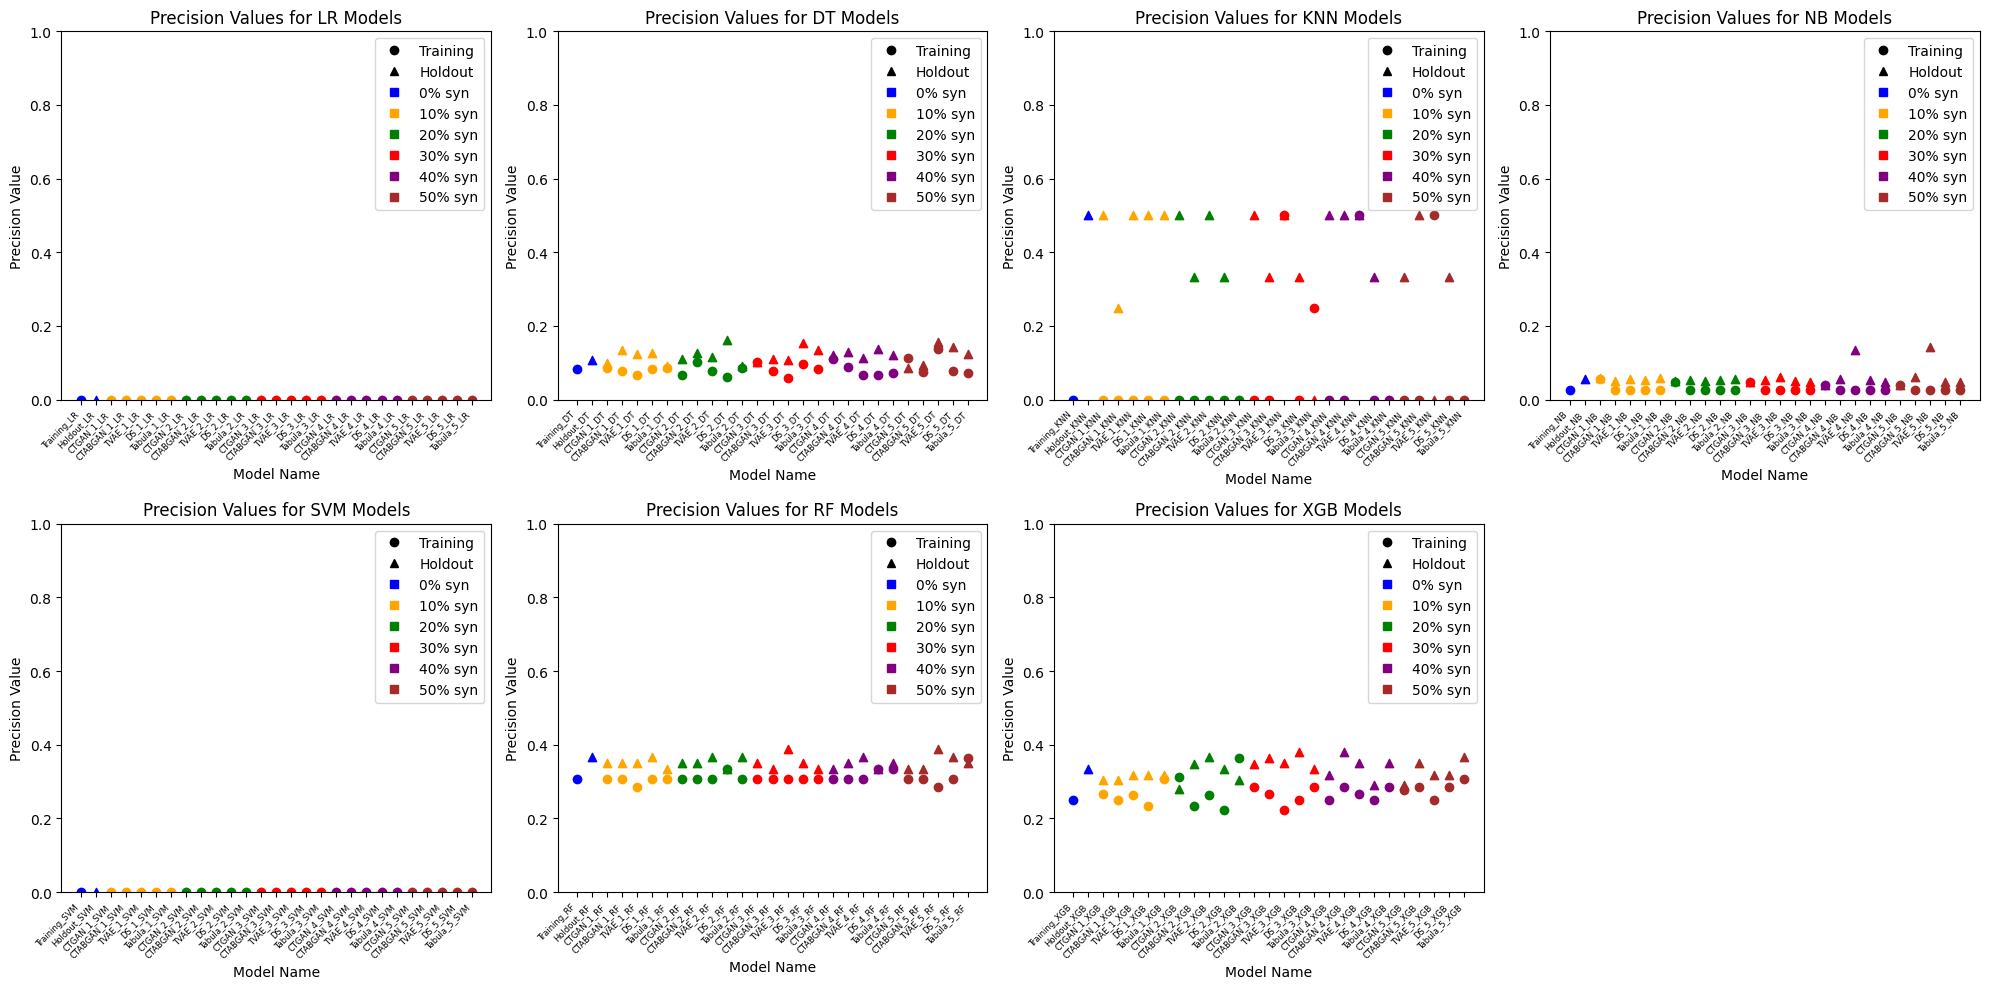

/var/folders/k9/hsjly5l56pb4_mv17mxbvn100000gn/T/ipykernel_21841/377898151.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(model_names_all, rotation=45, ha='right')


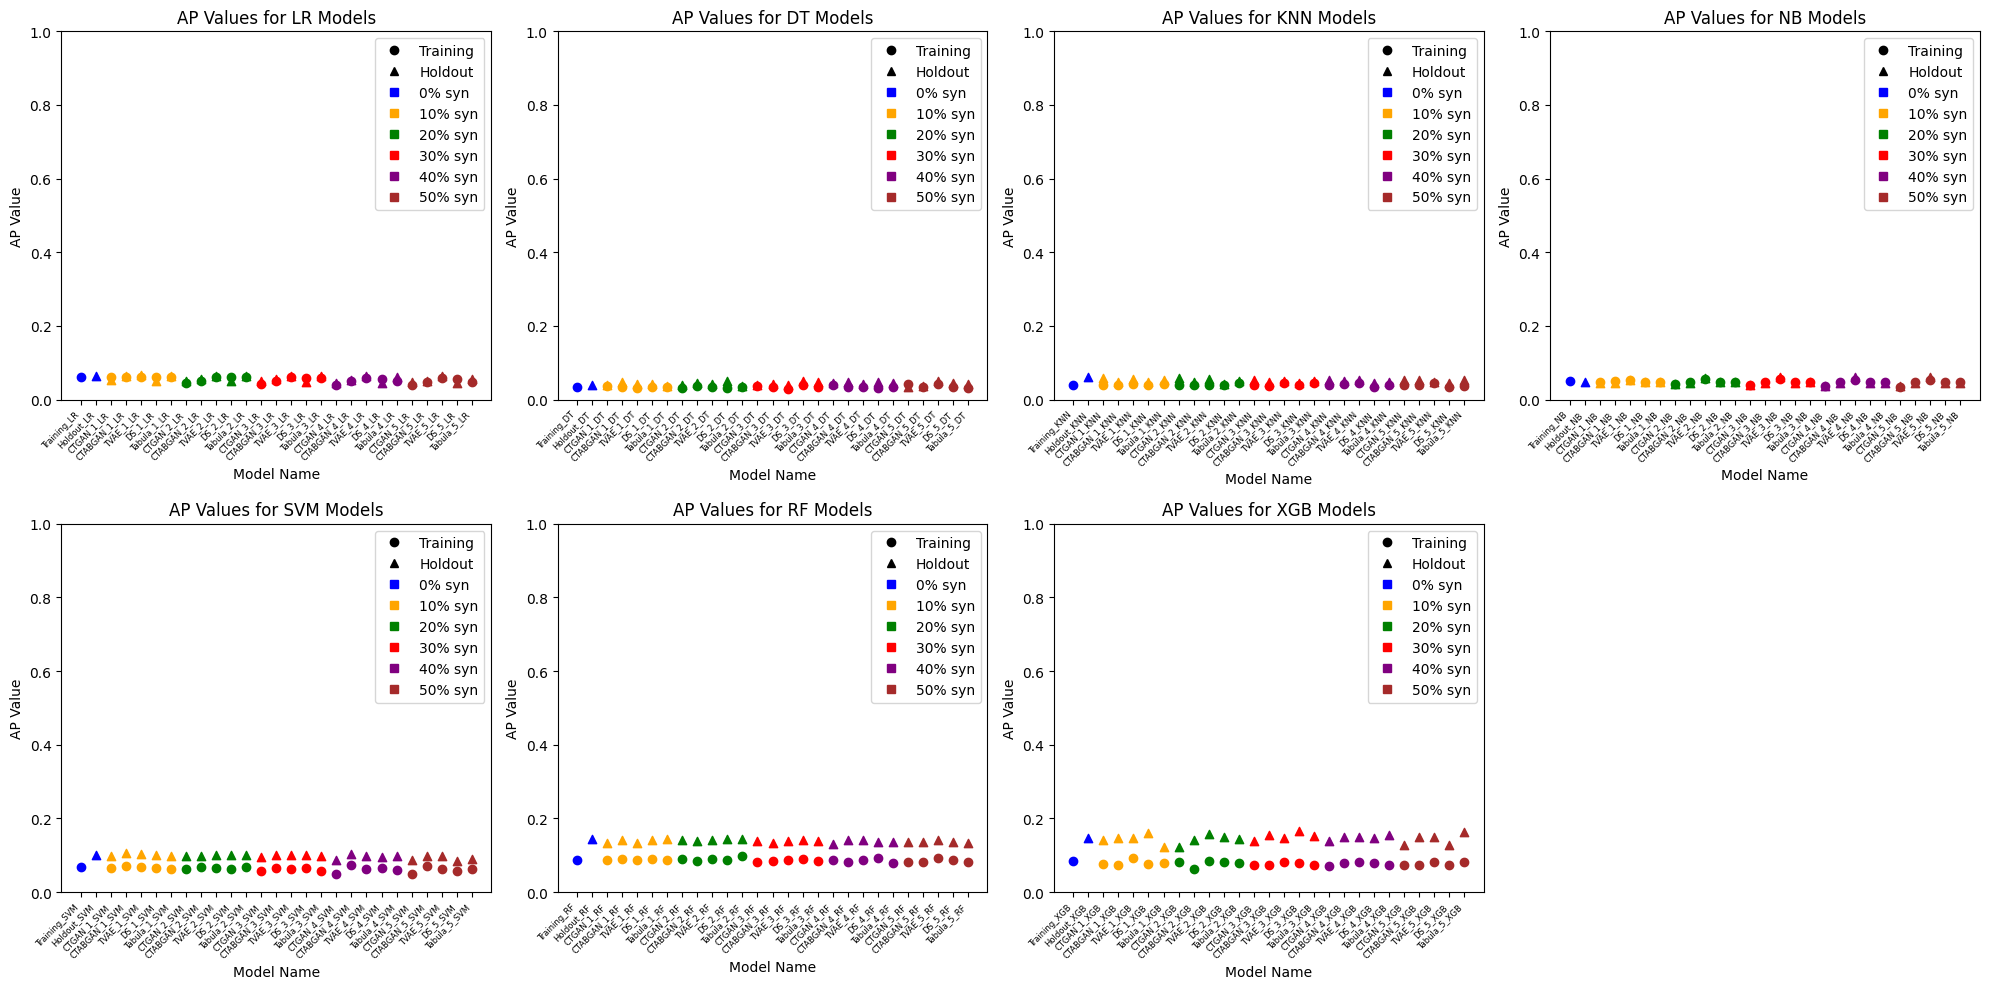

/var/folders/k9/hsjly5l56pb4_mv17mxbvn100000gn/T/ipykernel_21841/377898151.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(model_names_all, rotation=45, ha='right')


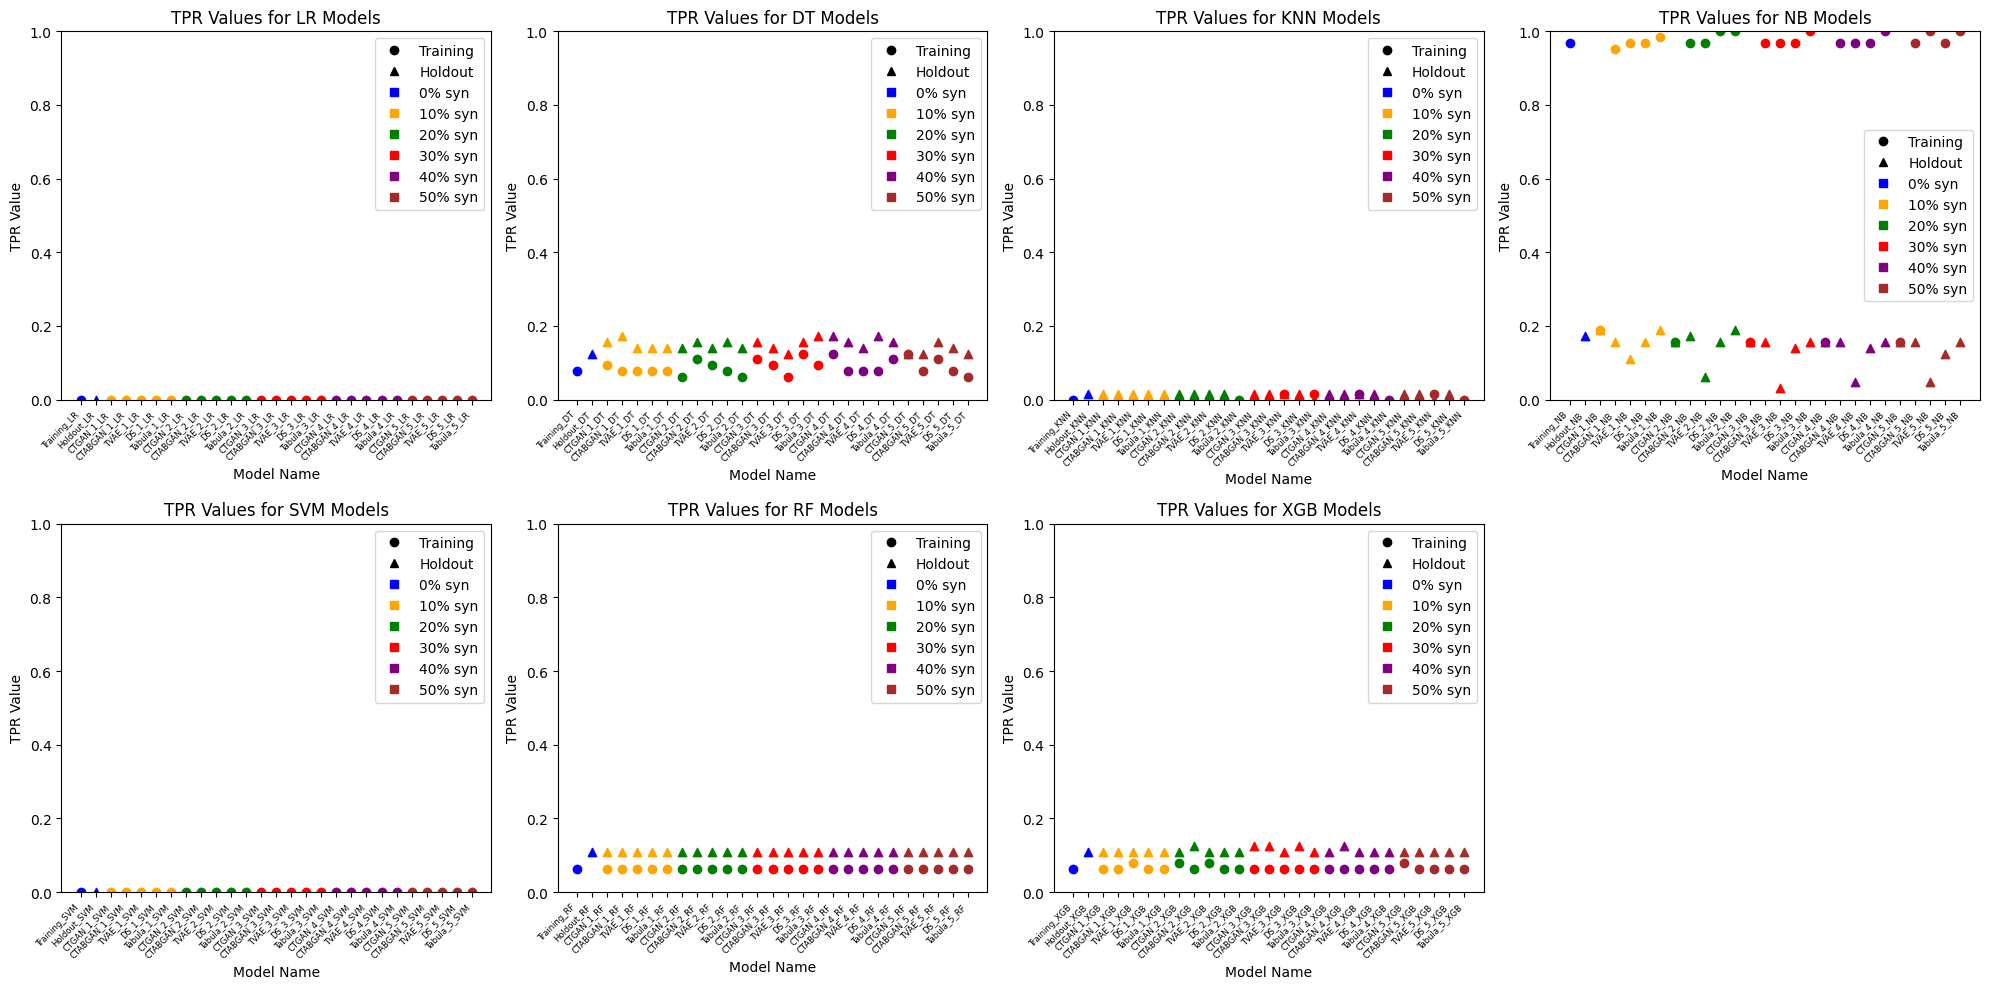

/var/folders/k9/hsjly5l56pb4_mv17mxbvn100000gn/T/ipykernel_21841/377898151.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(model_names_all, rotation=45, ha='right')


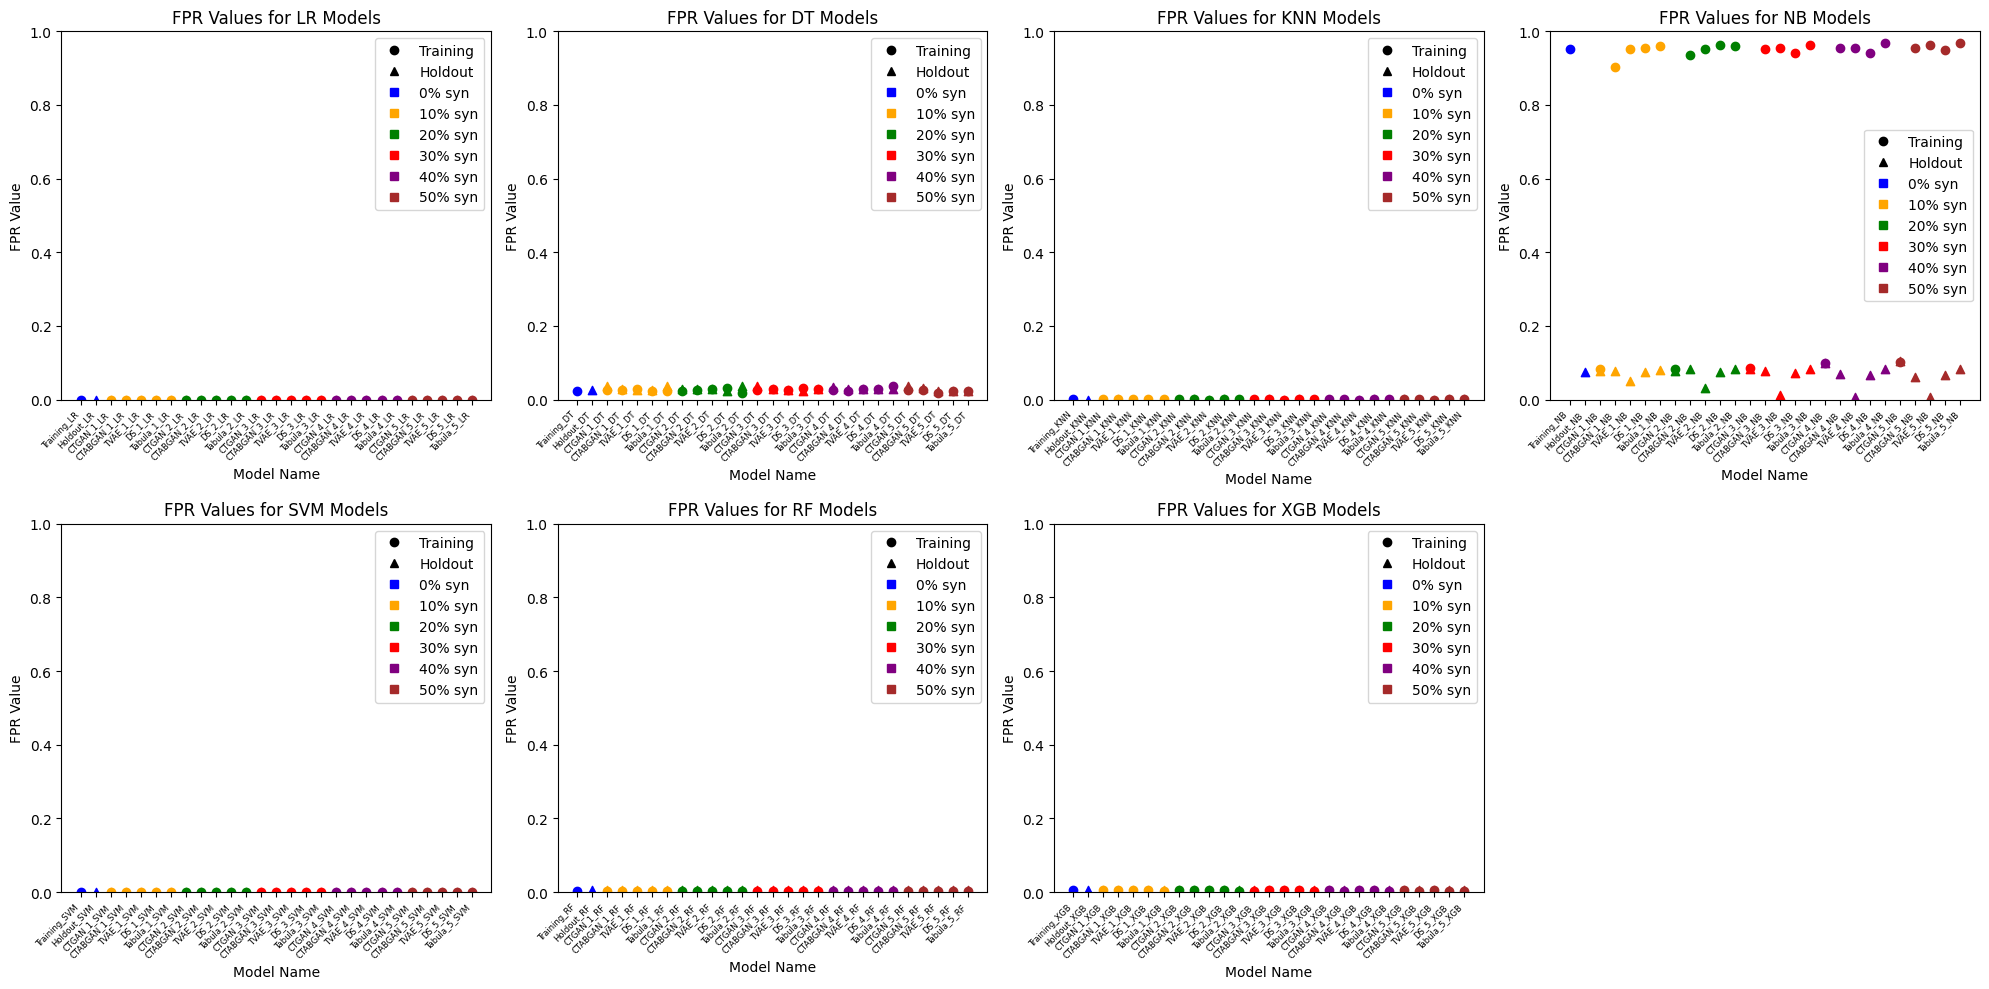

/var/folders/k9/hsjly5l56pb4_mv17mxbvn100000gn/T/ipykernel_21841/377898151.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(model_names_all, rotation=45, ha='right')


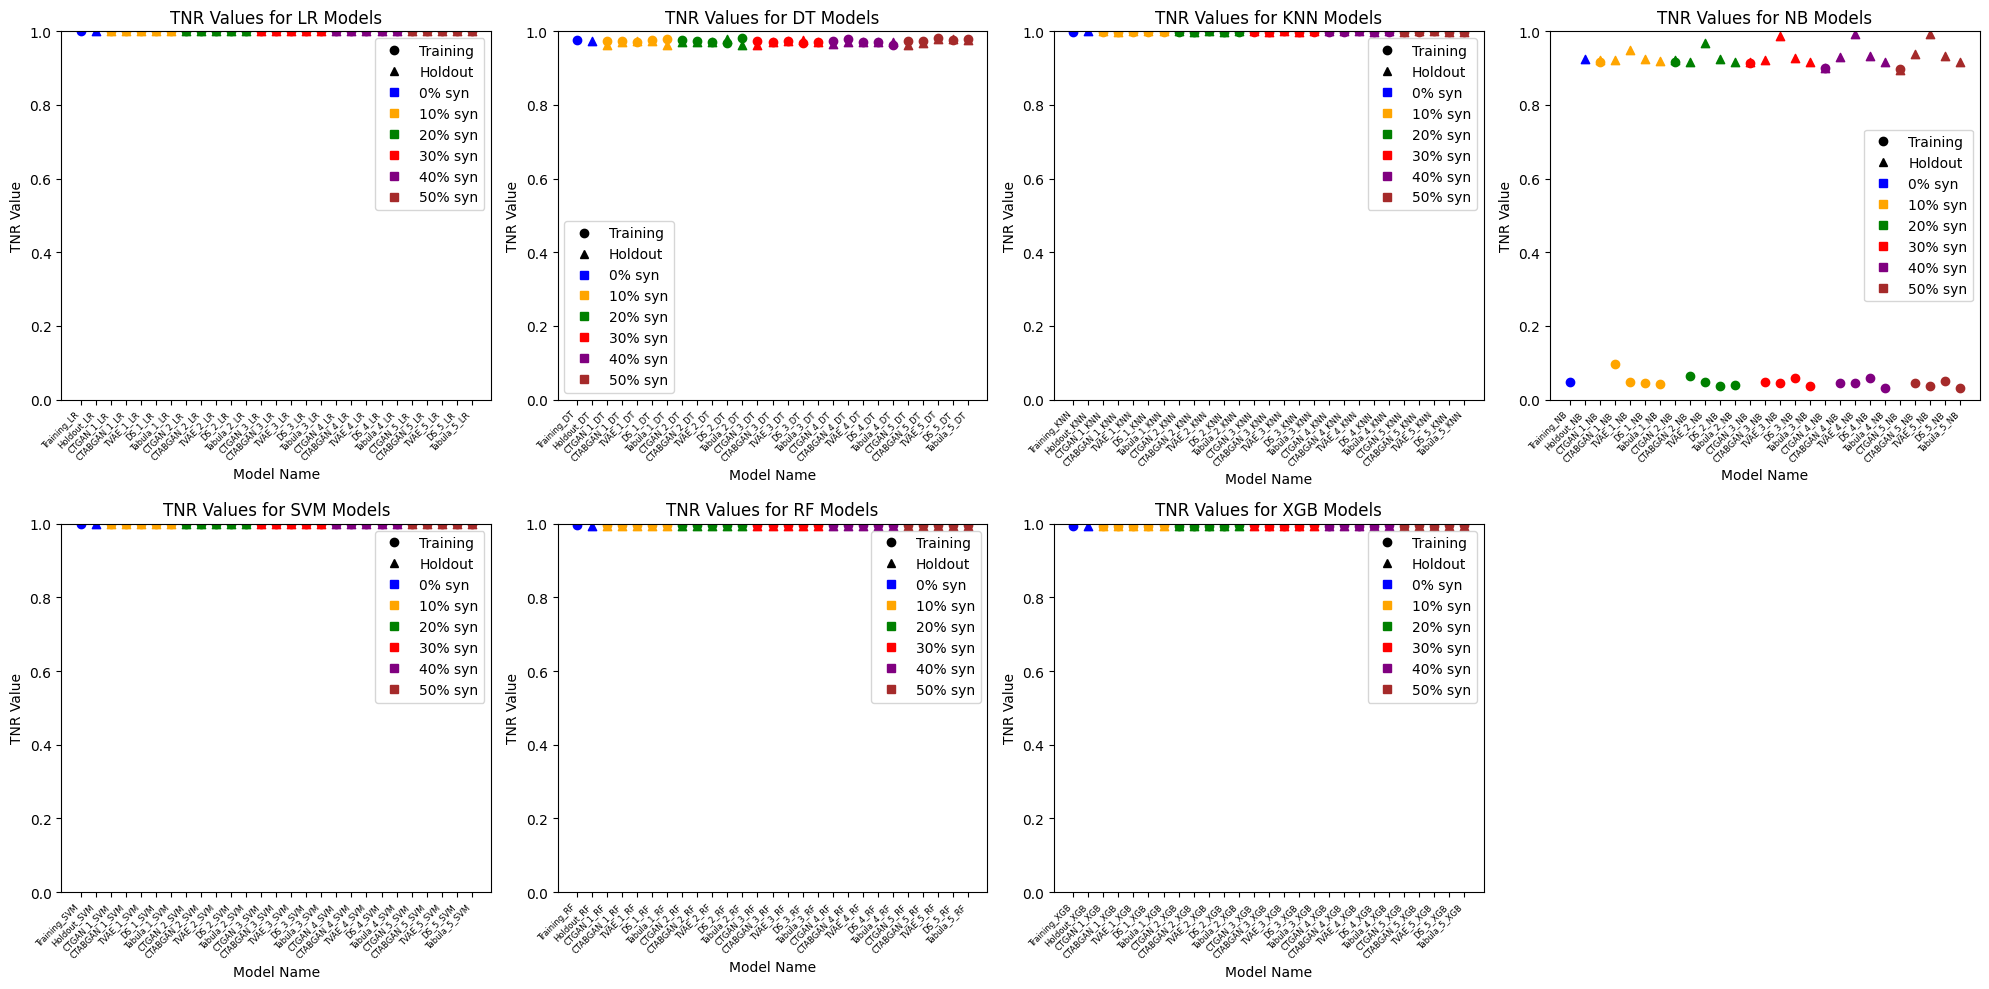

/var/folders/k9/hsjly5l56pb4_mv17mxbvn100000gn/T/ipykernel_21841/377898151.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(model_names_all, rotation=45, ha='right')


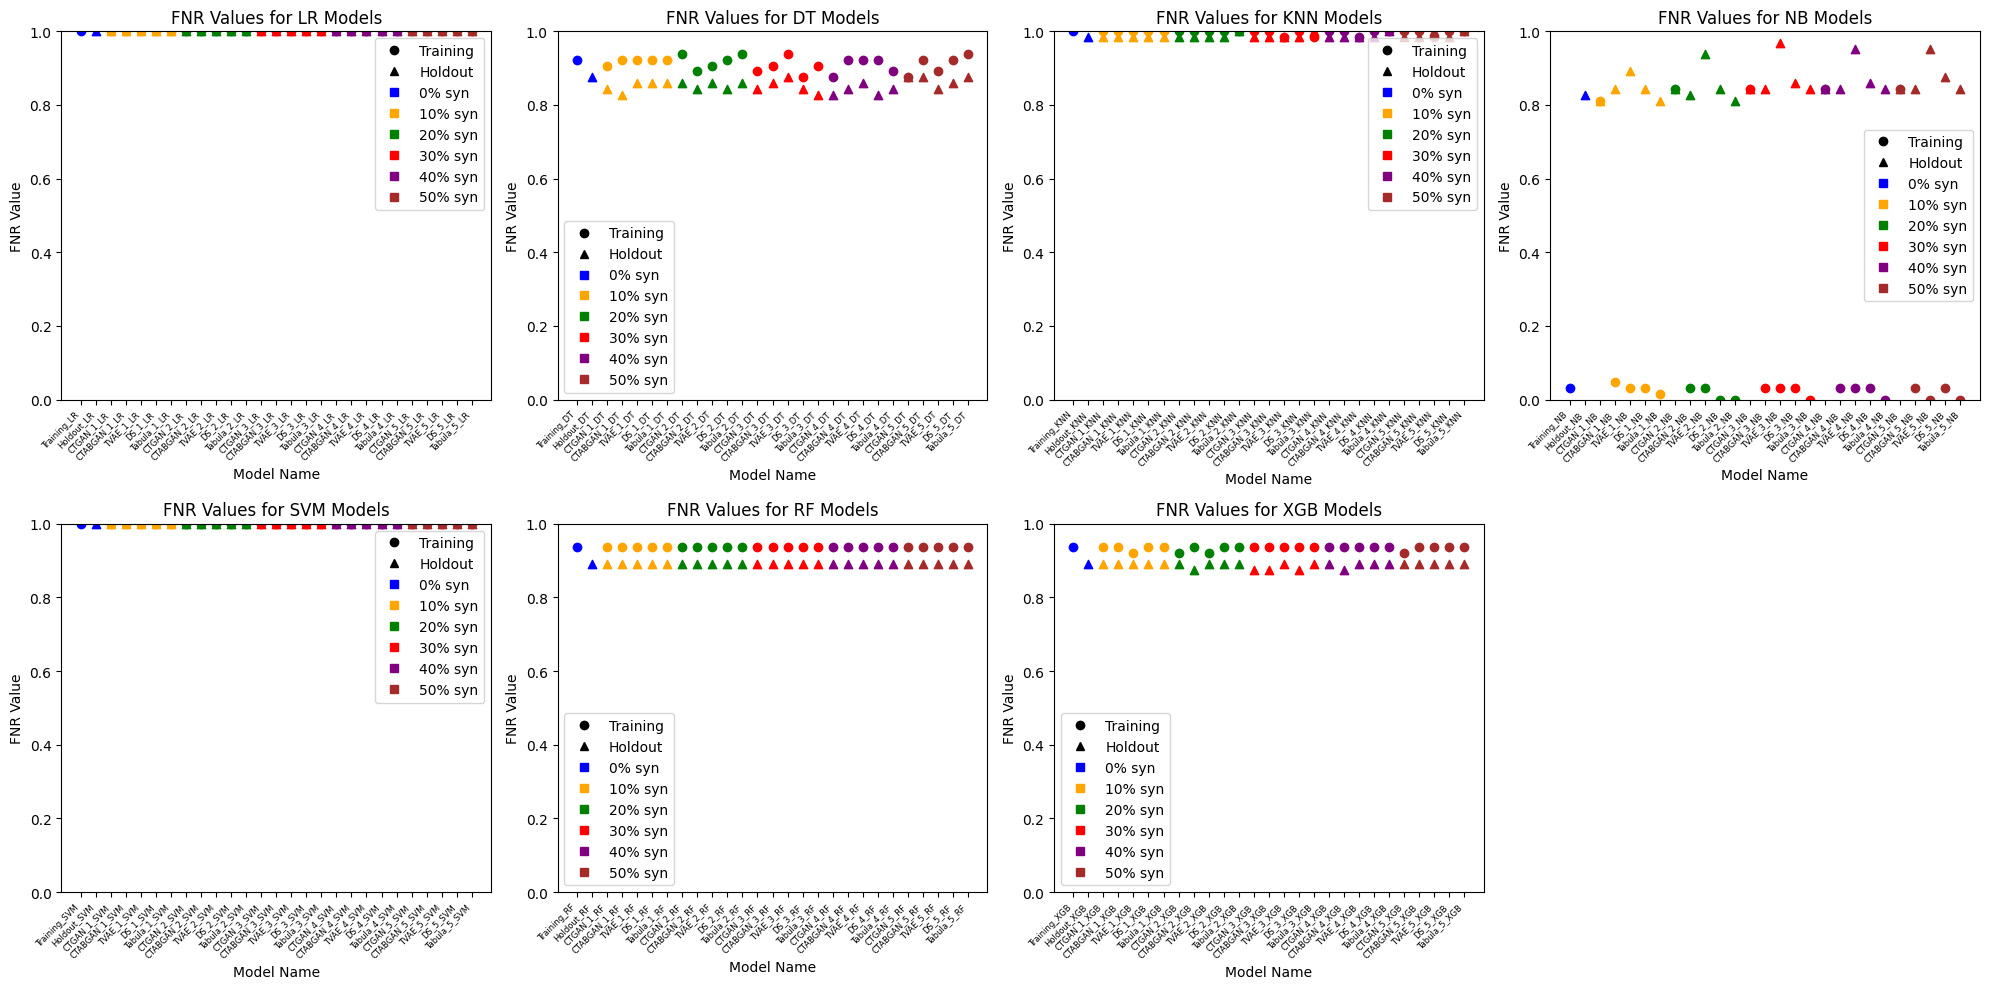

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_all_models_for_metric(file_path, metric, models):
    # Load the CSV file
    data = pd.read_csv(file_path)

    # Extract the base name of the file without extension
    #base_name = os.path.splitext(os.path.basename(file_path))[0]

    # Create subplots in a 2x4 grid
    fig, axs = plt.subplots(2, 4, figsize=(20, 10))
    axs = axs.flatten()

    for i, model in enumerate(models):
        # Filter the data to include relevant rows
        
        # Filter the data to include relevant rows
        model_names_all = []
        data_training = data[data['Unnamed: 0'].str.contains(f'Training_{model}')]
        data_holdout = data[data['Unnamed: 0'].str.contains(f'Holdout_{model}')]
    # Extract the model names and metric values
        model_names_training = data_training['Unnamed: 0']
        model_names_holdout = data_holdout['Unnamed: 0']
        model_names_all = model_names_all + list(model_names_training) + list(model_names_holdout)
        
        metric_values_training = data_training[metric]
        metric_values_holdout = data_holdout[metric]
    # Create the plot
        axs[i].scatter(model_names_training, metric_values_training, color='blue', label=f'Training ({model})')
        axs[i].scatter(model_names_holdout, metric_values_holdout, marker = '^', color='blue', label=f'Holdout ({model})')
    
        
        colors = ['orange','green','red','purple','brown']
        
        for j in range(5): # j+1 : number for the mixed rate, j+1 = 2 means the rate is 20%
            data_ = data[data['Unnamed: 0'].str.contains(f'{j+1}_{model}')] 
        
            data_training = data_[data_['Unnamed: 0'].str.contains(f'training')]
            model_names = data_training['Unnamed: 0'].str[9:]
            model_names_all = model_names_all + list(model_names)
            metric_values_training = data_training[metric] 
            axs[i].scatter(model_names, metric_values_training, color=colors[j], label=f'Training_syn{j+1} ({model})')
        
            data_holdout = data_[data_['Unnamed: 0'].str.contains(f'holdout')]
            metric_values_holdout = data_holdout[metric]
            axs[i].scatter(model_names, metric_values_holdout, marker='^',color=colors[j], label=f'Holdout_syn{j+1} ({model})')
        
        
        axs[i].set_xticklabels(model_names_all, rotation=45, ha='right')
        axs[i].set_xlabel('Model Name')
        axs[i].tick_params(axis='x', labelsize=6)
        axs[i].set_ylabel(f'{metric} Value')
        axs[i].set_title(f'{metric} Values for {model} Models')
        axs[i].set_ylim(0, 1)
        
        markers=['o','^']
        colors = ['blue','orange','green','red','purple','brown']
        f = lambda c,m: plt.plot([],[],color=c,marker=m, ls="none")[0]
        handles = [f("k", markers[i]) for i in range(2)]
        handles += [f(colors[i], "s") for i in range(6)]

        labels = ['Training','Holdout','0% syn','10% syn','20% syn','30% syn','40% syn','50% syn']

        #plt.legend(handles, labels, loc=3, framealpha=1)
        #axs[i].legend(loc='best')
        axs[i].legend(handles, labels, loc='best')
        
    # Hide any unused subplots
    for j in range(len(models), len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()

    # Save the plot
    output_path = f'{result_path}_{metric}_mixed_plot.png'
    plt.savefig(output_path)
    plt.show()

# Example usage
metrics = ['Accuracy', 'AUC', 'F1', 'Recall', 'Precision', 'AP', 'TPR', 'FPR', 'TNR', 'FNR']
models = ['LR', 'DT', 'KNN', 'NB', 'SVM', 'RF', 'XGB']  # List of all models

for metric in metrics:
    plot_all_models_for_metric(file_path, metric, models)